# MACHINE LEARNING USING MNIST DATASET 
### Submitted By - Anna Maria
## BUSINESS UNDERSTANDING
### BACKGROUND
The MNIST database of handwritten digits is commonly used for training image processing systems and  has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST and is believed that the training dataset has been taken from the American Census Bureau employees and test dataset is from American high school students as per WikiPedia. The digits have been size-normalized and centered in a fixed-size image.It has become something of a challenge to predict the MNIST data using a variety of techniques, and it is routinely used to validate new models and methods.

    
### OBJECTIVE
The objective of this project is to use the various machine learning methods which I have learnt to analyze and predict the handwritten numbers

In [1]:
#IMPORT ALL THE PACKAGES
from scipy import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## DATA UNDERSTANDING
### DATASET

The dataset consists of a pair of "handwritten digit image" and the "label". There are 70000 rows of data in the dataset.The digits range from 0-9 and the dataset is categorized as below:

•  Handwritten Image(data) : This is a gray scale image with 28 X 28 pixel. As the image is a 28 X 28 pixels we get an array in the X value which are represented as a 1D array of 784 values of the pixels ranging between 0 and 255.
    
•  label: This is the actual digit representation of the handwritten image.

## DATA PREPERATION
Data preparation is one of the key steps in the machine learning or data science life cycle. As we are dealing with image data in this assignment, we may have to prepare the data before we fit any models. So below i will be proceeding with a few approaches to clean and prepare the data for modeling.

###  LOAD THE DATASET
The first step is to load the matrix data and split the data set as training and test. The loaded dataset will be represented as 2 dimensional arrays and we will have to reshape them accordingly.

In [2]:
# LOAD THE DATASET
# SETUP THE WORKING DIRECTORY AND LOAD THE .MAT FILE
cwd = os.getcwd()
data = io.loadmat('mnist-original.mat')
x,y = data['data'].T,data['label'].T

#### PREPROCESS THE DATA

The data has been loaded and the next steps are to process the data. The first being checking for any missing values or null values in the dataset.

#### MISSING DATA
The below checks for any Nan values and returns a sum of all the missing values, but in this case we did not find any missing values.

In [3]:
#CHECK FOR NULL OR MISSING VALUES IN Y
np.isnan(y).sum()

0

In [4]:
#CHECK FOR NULL OR MISSING VALUES IN X
np.isnan(x).sum()

0

#### TRAIN/TEST SPLIT

The concept of train or test is to make sure that our model learns to perform well on existing data and  make close to accurate predictions on the future data, which makes it a generalizable model. So we split the data into train and test, apply all our transformations and fitting to the the training data and then finally predict using our test data to make sure our predictions are fine. 

In this process there are a lot of chances of overfitting the model with the training data, which means we may have to  optimize the hyperparameter(certain higher level properties which are used to optimize the model) and these have to be set before the model starts learning. So as we know that the training data can be overfit , we sub split the data again into 3 parts as Training, Validation and Test datasets.All parameter tuning to avoid complexity or increase speed can be done on the validation dataset.

Below i have split the dataset into training, validation and test dataset.

In [3]:
#SPLIT THE DATASET INTO TRAIN,VALIDATE AND TEST
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.7)
x_validate, x_test, y_validate, y_test = train_test_split( x_test, y_test, test_size=0.5)

In [4]:
#CHECK THE SHAPE OF THE TRAINING AND TEST SPLITS
print(x_train.shape)
print(x_validate.shape)
print(x_test.shape)

(21000, 784)
(24500, 784)
(24500, 784)


In [5]:
#CHECK THE MEAN,MIN AND MAX OF THE VALUES IN THE TRAINING DATASET
print(np.mean(x_train))
print(np.max(x_train))
print(np.min(x_train))

33.37086922983479
255
0


#### DATA SCALING
Data Scaling is one of the key steps to standardize the features in the dataset to bring them to the same scale. As different features within the dataset can be of a different magnitude, it is important to scale the data so that when we run the model we do not run into issues where one feature contributes more to the model than the other feature, it has to be proportionate.

In the below code i am going to use data standardization, as it scales down the properties to make sure the data is a normal distribution with a mean value of 0 and a standard deviation of 1 i.e it converts them to Z-Scores. Many algorithms require the data to be standardized before execution, some of them being PCA, KNN, SVC etc.

The Standardization of the data will be done for the training,validation and the test dataset,but the modelling and other paramter tuning will not be applied to the test dataset until the model has been completely trained. We apply what we learnt from the training dataset to the test dataset, which follows the general principle of anything you learn must be from the models training dataset.

In [4]:
#STANDARD SCALE OF THE XTRAIN/XTEST DATA.
xscalar = StandardScaler()
xscalar.fit(x_train)
standard_train = xscalar.transform(x_train)
standard_validate = xscalar.transform(x_validate)
standard_xtest = xscalar.transform(x_test)

Next visualize atleast one handwritten number from the overall dataset. The dataset consists of 10 classes from the number 0 to 9.
So below i have extracted the unique values from the labels to process the visualization.

In [7]:
#EXTRACT THE UNIQUE CLASSES OF THE IMAGES. THIS IS DONE FROM THE TRAIN DATASET
image_values = np.unique(y_train)
image_values

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

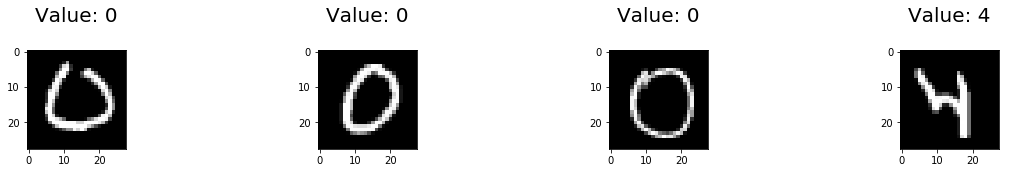

In [11]:
#VISUALIZE THE IMAGE NUMBERS FROM THE DATASET
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[10000:10004],y_train[10000:10004])):    
    plt.subplot(2, 4, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Value: %i\n' % label, fontsize = 20)

In [5]:
#FLATTEN THE ARRAY TO 1D 
y_train = y_train.ravel()
y_test = y_test.ravel()

The y data consists of the label for the corresponding classes, so when the data is stored it returns it as a 2D array. I have converted it to a 1D array so applying conditions and accessing the label will be easier in a 1D array.

## EXPLORATORY DATA ANALYSIS

#### Visualize one element from each class.

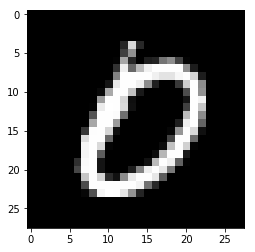

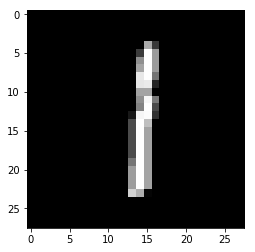

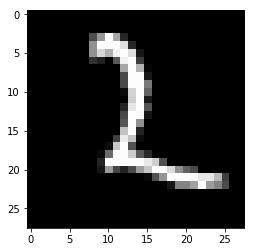

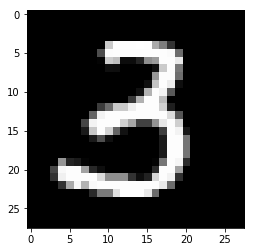

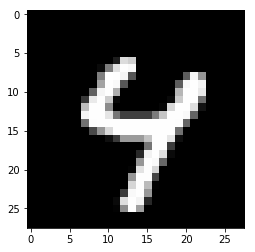

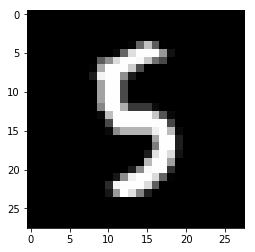

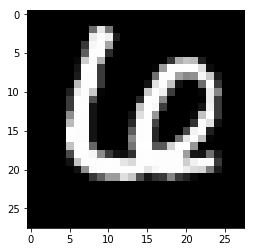

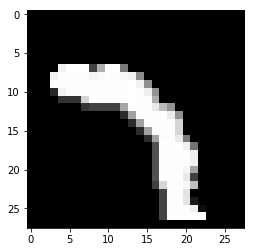

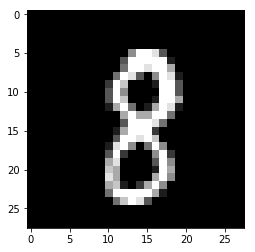

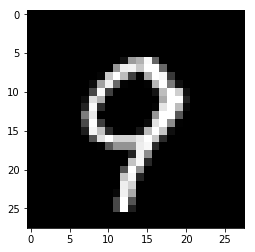

In [13]:
#LOOP THROUGH THE CLASS CREATED FOR EACH NUMBER AND DISPLAY THE CORRESPONDING SAMPLE OF THE IMAGE FROM X
plt.figure(figsize=(20,4))
for image in image_values:
    image = x_train[np.nonzero(y_train==image)[0][0]].reshape(28,28)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()

 #### Visualize the mean of each class.

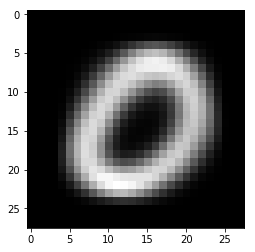

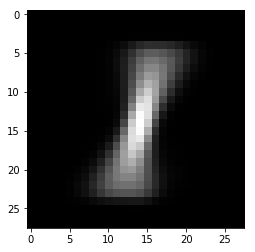

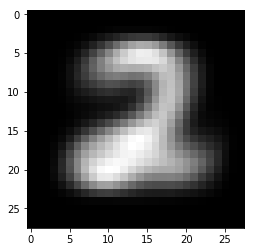

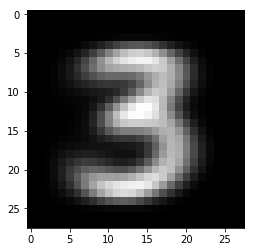

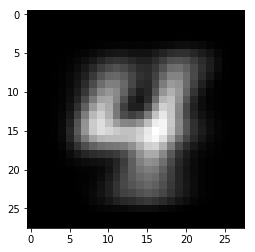

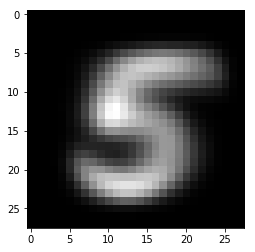

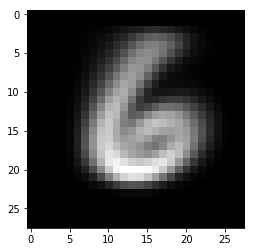

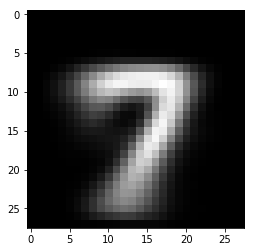

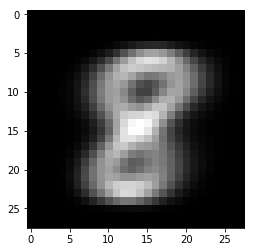

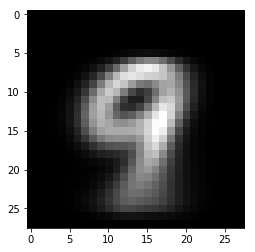

In [14]:
#LOOP THROUGH THE CLASS CREATED FOR EACH NUMBER AND DISPLAY THE CORRESPONDING SAMPLE OF THE IMAGE FROM X BY THE MEAN OF THE DATA
plt.figure(figsize=(20,4))
for image in image_values:
    image = np.mean(x_train[np.where(y_train==image)[0]],axis=0).reshape(28,28)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()

## DATA MODEL

### LOGISTIC REGRESSION

To understand the computation times on this dataset i will be fitting a simple Logistic Regression with solver set to lbfgs to check the computation time.

To start of i ran the Logistic Regression on the original non-scaled dataset with the default features, but the computation time for that went beyond 60 minutes, so i had to stop the processing.

So i am fitting a simple Logisitic Regression with the Broyd Fletcher solver to the training dataset which consists of 21000 data points. The below code includes both for the non scaled and the scaled data. The reason for using the solver as "lbfgs" is used when we want to optimize our dataset and also when we have a multinomial class problems. In this case we do not have a binary output and its multiple outputs.

For the first part alone i have fit the Logistic Regression on Scaled and Non Scaled Data to show the comparison, but after that i will be using only scaled data for the execution.

In [15]:
%%time
#LOGISTIC REGRSSION FOR THE NON SCALED XTRAIN AND YTRAIN DATASET USING Broyden-Fletcher-Goldfarb-Shannon as SOLVER 
imagelog_def = LogisticRegression(solver='lbfgs')
imagelog_def.fit(x_train,y_train)

Wall time: 11.6 s


In [16]:
#RESULTS FROM THE ABOVE CODE EXECUTION
imagelog_def

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
%%time
#LOGISTIC REGRESSION FOR THE SCALED XTRAIN AND YTRAIN DATASET USING Broyden-Fletcher-Goldfarb-Shannon as SOLVER 
imagelog_first = LogisticRegression(solver='lbfgs')
imagelog_first.fit(standard_train,y_train)

Wall time: 10.2 s


In [18]:
#RESULTS FROM THE ABOVE CODE EXECUTION
imagelog_first

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
#CHECK THE SCORES OF BOTH THE NON SCALED AND SCALED TRAINING DATA
print("The classification score for original non scaled data is: %3.3f" % (imagelog_def.score(x_train,y_train)* 100))
print("The classification score for scaled data is: %3.3f" % (imagelog_first.score(standard_train,y_train)* 100))

The classification score for original non scaled data is: 94.086
The classification score for scaled data is: 94.819


What i can see from the above is that the scaled data seems to be slightly better than the non scaled data in terms of computation time and next looking at the accuracy score i do not see much of difference, the improvement seems to be very minimal. When using features without standardization it can give variables with larger ranges greater importance in the analysis. Transforming the data to comparable scale can prevent this problem,but in our situation the variables or all columns are of the same range 0 to 255.

From what i have learnt so far Standardization does not make difference to the regression models, where the model by default compensates by adding higher or lower weights to the coeeficients. So i believe this really depends on the dataset.

In [20]:
#PREDICT THE VALUES USING THE TRAINED MODEL - PREDICT ON THE ENTIRE TEST DATASET 
#I WILL BE USING THE NON SCALED DATA FOR LOGISTIC REGRESSION
predictions = imagelog_def.predict(standard_xtest)

#CHECK THE ACCURACY OF THE PREDICTED VALUES
print("The classification score for the test data is: %3.3f" % (imagelog_first.score(standard_xtest,y_test)* 100))
print("The classification accuracy score for the test data is: %3.3f" % (accuracy_score(y_test,predictions)* 100))

The classification score for the test data is: 90.106
The classification accuracy score for the test data is: 61.543


I wanted to try the other optimizers and see what kind of impact it had on the model time and accuracy score. So i will be retaining the solver "lbfgs", but will try with different regularization strength for the C values.This is an attempt to optimize Hyperparameters and check how it optimizes the time.

[1.00000000e-08 7.74263683e-07 5.99484250e-05 4.64158883e-03
 3.59381366e-01 2.78255940e+01 2.15443469e+03 1.66810054e+05
 1.29154967e+07 1.00000000e+09]
2.1 s ± 42.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.59 s ± 36.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.89 s ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.64 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.5 s ± 351 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.5 s ± 603 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.2 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.3 s ± 233 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.7 s ± 310 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.8 s ± 614 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


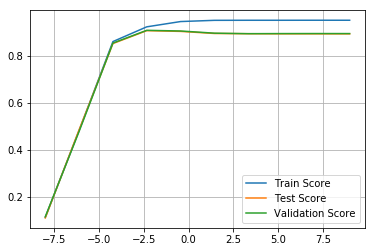

In [21]:
#LOGISTIC REGRESSION FOR THE XTRAIN AND YTRAIN DATASET USING Broyden-Fletcher-Goldfarb-Shannon as SOLVER AND OTHER OPTIMIZERS
train_scores = []
validation_scores = []
test_scores = []

#VARIOUS VALUES OF C
cs = np.logspace(-8, 9, 10)
print(cs)

for c in cs:
    imagelog = LogisticRegression(penalty='l2', C=c, solver='lbfgs')
    %timeit imagelog.fit(standard_train,y_train)
    train_scores.append(imagelog.score(standard_train,y_train))
    test_scores.append(imagelog.score(standard_xtest,y_test))
    validation_scores.append(imagelog.score(standard_validate,y_validate))

    
#PLOT THE ABOVE SCORES
plt.plot(np.log10(cs), train_scores,label="Train Score")
plt.plot(np.log10(cs), test_scores,label="Test Score")
plt.plot(np.log10(cs), validation_scores,label="Validation Score")
plt.grid()
plt.legend()
plt.show()

From the above execution i can say that the l2 penalty and the solver has some effects in the computation time, but the important parameter would be the C regularization strength. As the value changes from low to high the computation time also changes accordingly. 

The pattern of the training, validation and test data seem to be very close and then validation/test drop off as the regularization strength starts to increase.This seems to a good pattern as i do not see a lot of gap between the train and test, which means my model is not overfit. 

#### Dimensionality Reduction

Dimensionality Reduction is the process of reducing the number of chosen predictor variables to a set of principle variables. There are many reasons to do dimensionality reduction and some of them are as listed below:

1) High Dimensional Data takes high computation time and space complexity, meaning the more the dimensions it increases the volume of data which in turn increases the computation time of processing the data.

2) There are very chances of overfitting the data, meaning the data is trained really well with a very high accuracy score.

3) It is not necessary that all the dimensions are relevant to the problem we are analyzing.

There could be many more reasons but i have listed my understanding of the concept. Dimensionality Reduction could be categorized into Feature Selection and Feature Extraction.

Feature Selection is the process of finding the most relevant dimensions that are well suited and could contribute to the model. This can be achieved by intuition or by using various models which could choose the most relevant features. A good example could be decision trees.One of the disadvantage of feature selection is when you choose certain features and drop others there are chances of losing data or information that could be important to the problem we are trying to solve. Some of the feature selection approaches are variance threshold(using filter methods),Univariate/Mutlivaraite selections or Regularizations.

Feature Extraction is the process of taking all the dimensions into account and generating new features which is using the high dimensional data and tranform is to a lower dimension but not losing the information of the old features. One of the important concepts I will be using for this is "Principle Component Analysis", the reason i chose to use this is as i am working with image data which is multi dimensional data.

Principle Component Analysis is a reduction technique which transforms high dimensional data to a lower dimensional sub space and to a new coordinate system. As per its name it actually finds the principle components or ideal components that are hidden in the underlying structure of the data and helps understand the direction where is more variance and where the data is actually spread out. Some of the Key reasons for using PCA in this context is to :

a) To improve model performance and the computation time as we have a multidimensional image dataset.

b) To avoid the issues of overfitting the model 

c) It simplifies the dataset and facilitates visualization and insight of whats actually going on with this dataset.

To add to this point, PCA expects that the data should be scaled or normalized so that it can provide an unbiased view of the reduced components, otherwise attributes with large values and variance may dominate the first principle component.

In [22]:
#BUILD AND FIT A PCA ON THE SCALED TRAINING DATA - NO COMPONENTS WERE CHOSEN ON THIS
my_pca_scaled = PCA()
my_pca_scaled.fit(standard_train)

#TRANSFORM THE DATA - BOTH TRAINED AND TEST DATA
X_PCA_SCALED = my_pca_scaled.transform(standard_train)
X_PCA_TEST_NOCOMP = my_pca_scaled.transform(standard_xtest)

In [23]:
#CHECK THE NUMBER OF SCALED COMPONENTS
my_pca_scaled.n_components_

784

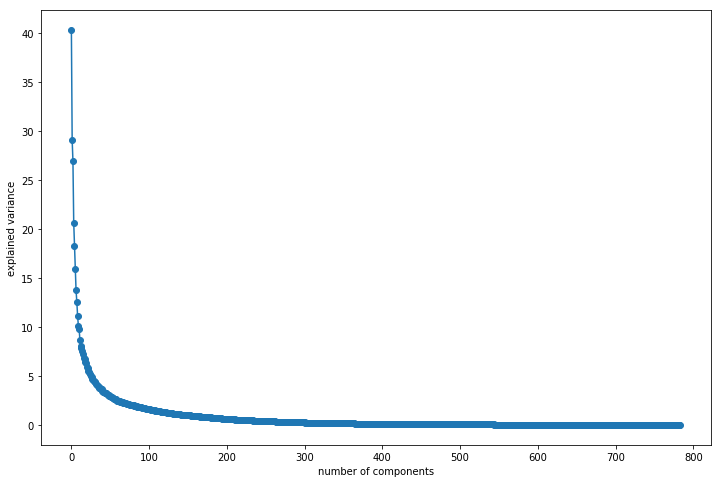

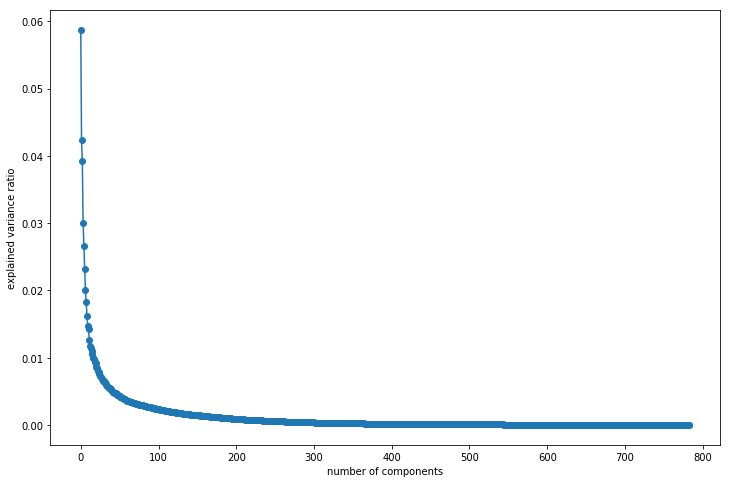

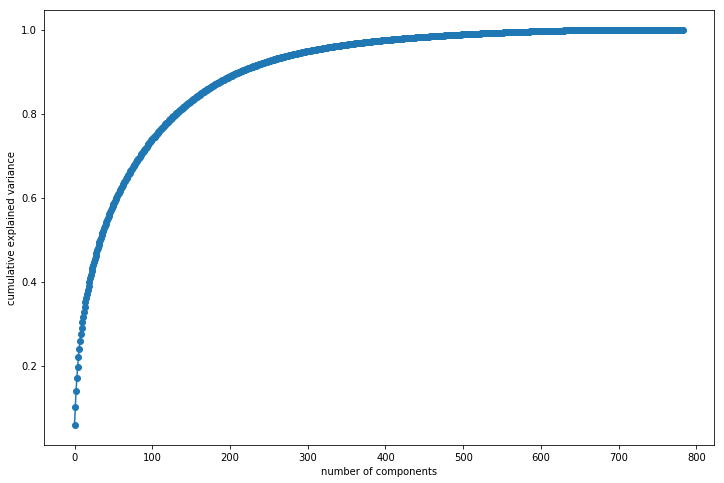

In [24]:
#PLOT THE VARIANCE ON THE PCA APPLIED\
plt.figure(figsize=(12, 8))
plt.plot(my_pca_scaled.explained_variance_, marker='o')
plt.xlabel('number of components')
plt.ylabel('explained variance');
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(my_pca_scaled.explained_variance_ratio_, marker='o')
plt.xlabel('number of components')
plt.ylabel('explained variance ratio');
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(my_pca_scaled.explained_variance_ratio_), marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [25]:
%%time
#LOGISTIC REGRSSION FOR THE SCALED DATA AFTER PCA DONE
imagelog_pca_second = LogisticRegression(solver='lbfgs')
imagelog_pca_second.fit(X_PCA_SCALED,y_train)

Wall time: 10.1 s


In [26]:
#RESULTS FROM THE ABOVE CODE EXECUTION
imagelog_pca_second

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
#COMPARE THE MODEL SCORES ORIGINAL SCALED TRAINING DATA VS SCALED PCA APPLIED DATA AND THE SCALED PCA TEST DATA.
print("The classification accuracy for Original Scaled data is: %3.3f" % (imagelog_first.score(standard_train,y_train)* 100))
print("The classification accuracy for scaled data with PCA is: %3.3f" % (imagelog_pca_second.score(X_PCA_SCALED,y_train)* 100))
print("The classification accuracy for scaled test data with PCA is: %3.3f" % (imagelog_pca_second.score(X_PCA_TEST_NOCOMP,y_test)* 100))

The classification accuracy for Original Scaled data is: 94.819
The classification accuracy for scaled data with PCA is: 94.819
The classification accuracy for scaled test data with PCA is: 90.106


As a first step for reducing the dimensions, I applied the PCA algorithm with the default settings without choosing the number of components. So PCA has created the same number of principle components as the original 784 features and created new features. The time taken to compute the model after PCA shows some changes when compared to the original scaled data. 

And when looking at the score of the models it looks like the training model score seems to be higher than the test data scores after scaling and applying the PCA transformation. From the 3 plots for explained variance it looks like majority of varaince has been captured by the first 100 components.

As the goal is to make sure that the number of components provided explain the maximum variance in the data, i will go ahead and set to .99.The reason i have chosen .99 is because it is very difficult to choose only 50 to 100 components as this is image data and i need to make a best guess, so i am choosing a percentage of 99, which means all the data which fall within that explained variance range. From the cum variance graph, even though it is a curve i can say that the maximum of .99 would improve the score and time, but not the quality of image prediction.

In [19]:
#TO ASSESS HOW TO DECIDE ON THE NUMBER OF COMPONENTS FOR THE PCA
my_pca_ncomp = PCA(.99)
my_pca_ncomp.fit(standard_train)

#TRANSFORM THE DATA WITH NCOMPONENTS 
X_PCA_NCOMP = my_pca_ncomp.transform(standard_train)
X_PCA_VALID = my_pca_ncomp.transform(standard_validate)
X_PCA_TEST = my_pca_ncomp.transform(standard_xtest)

In [29]:
%%time
#LOGISTIC REGRSSION FOR THE SCALED AFTER PCA - BY CHOOSING THE NUMBER OF COMPONENTS
imagelog_pca_ncomp = LogisticRegression(solver='lbfgs')
imagelog_pca_ncomp.fit(X_PCA_NCOMP,y_train)

Wall time: 7.88 s


In [30]:
#RESULTS FROM THE ABOVE CODE EXECUTION
imagelog_pca_ncomp

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
#CHECK THE NUMBER OF SCALED COMPONENTS
my_pca_ncomp.n_components_

514

In [32]:
#PRINT THE ACCURACY SCORE FOR THE TRAIN AND TEST DATA.
print("The classification accuracy for PCA scaled train data is: %3.3f" % (imagelog_pca_ncomp.score(X_PCA_NCOMP,y_train)* 100))
print("The classification accuracy for PCA scaled test data is: %3.3f" % (imagelog_pca_ncomp.score(X_PCA_TEST,y_test)* 100))

The classification accuracy for PCA scaled train data is: 94.024
The classification accuracy for PCA scaled test data is: 90.682


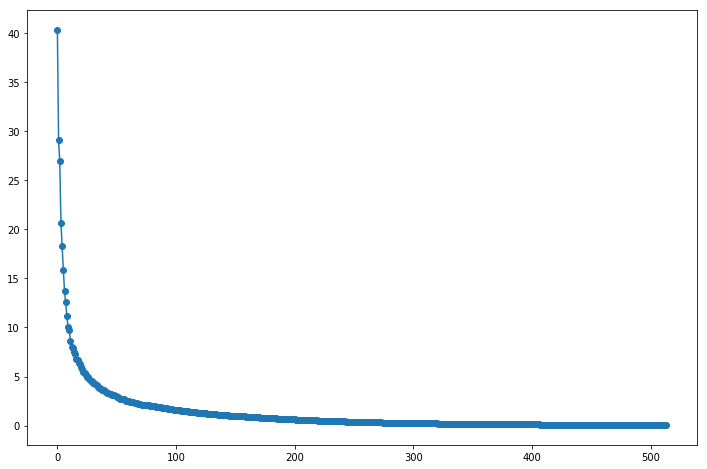

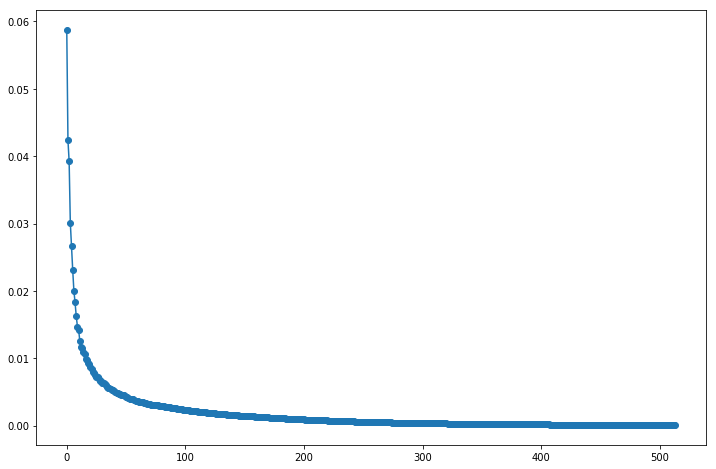

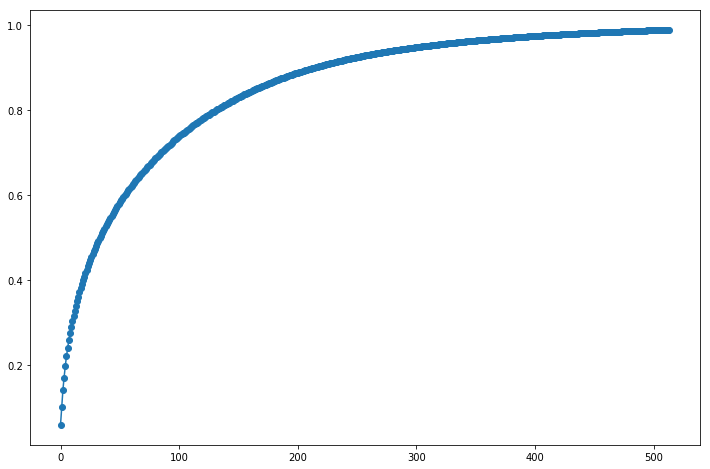

In [33]:
#PLOT THE VARIANCE ON THE PCA APPLIED WITH .95 APPLIED
plt.figure(figsize=(12, 8))
plt.plot(my_pca_ncomp.explained_variance_, marker='o')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(my_pca_ncomp.explained_variance_ratio_, marker='o')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(my_pca_ncomp.explained_variance_ratio_), marker='o')
plt.show()

From the above scores i can say that there has been a good difference in the computation time to fit the model, the time has actually reduced by half of the PCA that was done on all 784 features. Parallely, i can also see that it has impacted the score of the model fit on the training and test datasets.The number of components have been reduced to 521 from the 784, but i think this is a good score as PCA is meant to reduce the high dimentionality and at the same time it takes into consideration all the important features of the data without losing any important information.

Working with high dimensional data is computationally heavy, so applying scaling and PCA has helped improve the efficiency of the model but still retaining the key features of the data.

In [34]:
#PREDICT THE VALUES USING THE TRAINED MODEL - PREDICT ON THE ENTIRE TEST DATASET 
#I WILL BE USING THE NON SCALED DATA FOR LOGISTIC REGRESSION
predictions = imagelog_pca_ncomp.predict(X_PCA_TEST[0:10])

#CHECK THE ACCURACY OF THE PREDICTED VALUES
print("The classification accuracy for non scaled test data is: %3.3f" % (imagelog_pca_ncomp.score(X_PCA_TEST,y_test)* 100))

The classification accuracy for non scaled test data is: 90.682


From the above 2 PCA executions what i can see is that:

<b>Advantage:</b>

1) PCA has helped with the reducing the computation time and has helped in making the model run significantly faster than when it had more dimensions.

2) It has helped reduce the space occupied by the high dimensions by reducing the components to half and into a smaller space.

<b>Disadvantage:</b>

1) The main purpose of using PCA in this scenario was to make sure that we not lose a lot of information about the images and also make sure we are able to identify the correlated variables and create uncorrelated “principal components”. So in this case I was able to identify the components but in the process of simplification there was a certain amount of accuracy that was lost which was a tradeoff. So i am expecting that there may be a little impact to the visualization of the images.

As i am working to understand the computation times, i will go ahead split the Validation dataset, the reason being my training dataset is smaller than my validation/test dataset. So i will have to see what happens when my data points are reduced to anything smaller than these datasets. Again this split will be used only for this part and will not be used for anything else.

In [35]:
#SPLIT THE VALIDATION DATASET TO TEST THE COMPUTATION TIME AND HOW IT HELPS OR DOES NOT HELP
x_validate_time, x_test_time, y_validate_time, y_test_time = train_test_split( x_validate, y_validate, test_size=0.2)
x_validate_time.shape

(19600, 784)

In [36]:
%%time
#LOGISTIC REGRESSION FOR THE REDUCED DATASET - ONLY FOR TESTING COMPUTATION TIME
imagelog_split = LogisticRegression(solver='lbfgs')
imagelog_split.fit(x_validate_time,y_validate_time)

Wall time: 11.3 s


In [37]:
imagelog_split

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
#PRINT THE ACCURACY SCORE FOR THE TRAIN AND TEST DATA.THIS DATA HAS BEEN FURTHER SPLIT FROM THE ORIGINAL TRAINING DATA.
print("The classification accuracy for scaled data is: %3.3f" % (imagelog_split.score(x_validate_time,y_validate_time)* 100))
print("The classification accuracy for scaled test data is: %3.3f" % (imagelog_split.score(x_test_time,y_test_time)* 100))

The classification accuracy for scaled data is: 94.556
The classification accuracy for scaled test data is: 90.204


The above results show that the reduction of the data samples does have an impact on the time, it reduces the storage space and improves the computational efficiency which in turn helps with the time taken to process the model fit.Something important to note is that the amount of data needed depends on the complexity of the problem, and the strongest signals in the data will show up even with relatively small samples of the data.

From the above executions what i can see is that:

<b>Advantage:</b>

1) Reducing the number of data points by another 50% and scaling the data has helped with the computation time and it has been almost reduced to half the original training dataset time.

<b>Disadvantage:</b>

1) But reducing the sample size seems to have improved the accuracy score of the training dataset which means the model has been overfit to the training data, but not on the testing data.Overfitting a model which is very close to accuracy means it will fail when we use this model to predict in the future.

#### K-FOLD CROSS VALIDATION

K-Nearest Neighbors is a classification algorithms which predicts on how close or far the data points are, basically how one data point takes importance over the other.One of the major drawbacks of working with this algorithm is that it actually memorizes the complete features of the training dataset and when a new set of data is fed to it, the algorithm goes through the overall training data measures and predicts or outputs. 

Earlier in the above code executions we came across the train/test split where i mentioned about creating a validation set and the reasons of optimizing hyperparameterss.But in that split I used my own way of partitioning the data, based on my judgement and this may not be the best approach when the main goal is to improve the model performance. So in such a scenario is where we would use the idea of cross validation.

Cross Validation is a technique where we provide the partion number(k-folds) which runs the analysis on each fold, and then average the overall error estimate.One of the most important it avoids overfitting of data, where once the combination of best parameters are identified, we can use those parameters for the actual model.

So i am using the K value of KNN set as a list from 1 to 15. The goal is to apply cross validation and execute the KNN algorithm on the scaled training dataset. To improve the efficiency of KNN i will be using the PCA applied dataset with a cross validation fold of 5.

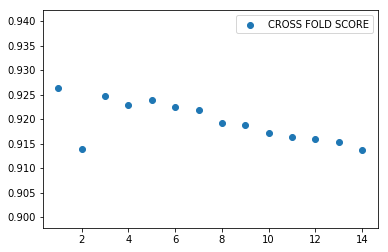

Best Validation Score:  1


In [42]:
#SET THE K VALUE OF 1 TO 15 FOR KNN AND EXECUTE THE KNN TO RETURN THE MODEL FIT
b = range(1,15)
knn_cross_score_list = []

for k in b:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn_cross_score = np.mean(cross_val_score(knn, X_PCA_NCOMP, y_train, cv = 5))
    knn_cross_score_list.append(knn_cross_score)
    
plt.scatter(b, knn_cross_score_list,label="CROSS FOLD SCORE")
plt.legend();
plt.show();

print("Best Validation Score: ", knn_cross_score_list.index(np.max(knn_cross_score_list))+1)


In [43]:
#LIST DOWN THE VALUE OF THE SCORE
for i in enumerate(knn_cross_score_list):
    print((i))

(0, 0.9263804836011047)
(1, 0.913903502172519)
(2, 0.9246654249618192)
(3, 0.9228564791008452)
(4, 0.9239040190886467)
(5, 0.9225226454871274)
(6, 0.9218562393947654)
(7, 0.919237144486582)
(8, 0.9187128354270175)
(9, 0.9171418141284684)
(10, 0.9163322554709158)
(11, 0.9159987974561619)
(12, 0.915379624556205)
(13, 0.9136182511500138)


For a 5 fold cross validation with k = 1 to 15 , i can see that the maximum accuracy is at "1","2", "5" which has a score ranging from  92.6% to 92.25% . This accuracy was achieved on the validation dataset. The whole point of using cross validation is to assess the skill of the model by validating it randomly at different data points which are shuffled throughout the model. How well we can choose the k in the K-Fold actually decides how well our model works. A poorly chosen K Fold value may result in a mis-representation of the model fit.

So with a 5-Fold Cross validation the score was closer to 92% and the K value for KNN was optimal at 5 because i ran the above code multiple times and think that 5 is a better option, because 1 and 2 seem to be overfit for this model.The reason behind the importance of choosing the K value, is that if not chosen well the score could lead to high variance or high bias issues. 

In [21]:
#TRAIN THE KNN MODEL WITH THE BEST SCORE FOUND FROM ABOVE AND CHECK THE SCORES
knnwithK = neighbors.KNeighborsClassifier(n_neighbors=5).fit(X_PCA_NCOMP, y_train)
print(f'Score on train: {knnwithK.score(X_PCA_NCOMP, y_train):.3%}')
print(f'Score on validation:  {knnwithK.score(X_PCA_VALID,y_validate):.3%}')
print(f'Score on test:  {knnwithK.score(X_PCA_TEST,y_test):.3%}')

Score on train: 95.162%
Score on validation:  93.012%
Score on test:  93.024%


#### UNDERSTAND BIAS-VARIANCE TRADE OFF

I ran into a lot of issues while executing the data for this and my system has not been able to handle the amount of data. For this part what i have done is I created the train/test split from the original data,applied standardization  and then fitted the model. Also i will use the same data when i answer the same for decision trees too. The sample size is very small, around 14000 rows.

In [56]:
#SPLIT THE DATASET INTO TRAIN,VALIDATE AND TEST
x_train_knn, x_test1, y_train_knn, y_test1 = train_test_split( x, y, test_size=0.6)
x_validate_knn, x_test_knn, y_validate_knn, y_test_knn = train_test_split( x_train_knn, y_train_knn, test_size=0.5)

In [45]:
#STANDARD SCALE OF THE XTRAIN/XTEST DATA.
scalar = StandardScaler()
scalar.fit(x_train_knn)
knn_train = scalar.transform(x_train_knn)
knn_xtest = scalar.transform(x_test_knn)
knn_validate = scalar.transform(x_validate_knn)

In [46]:
#SET THE K VALUE OF 1 FOR KNN AND EXECUTE THE KNN TO RETURN THE MODEL FIT
knn_model_one = neighbors.KNeighborsClassifier(n_neighbors=1).fit(knn_train, y_train_knn)
print(f'Score on train: {knn_model_one.score(knn_train,y_train_knn):.3%}')
print(f'Score on validation:  {knn_model_one.score(knn_validate,y_validate_knn):.3%}')
print(f'Score on test:  {knn_model_one.score(knn_xtest,y_test_knn):.3%}')

Score on train: 100.000%
Score on validation:  100.000%
Score on test:  100.000%


In [47]:
#SET THE K VALUE AS LENGTH OF THE DATA POINTS FOR KNN AND EXECUTE THE KNN TO RETURN THE MODEL FIT
lenknn = len(knn_train)
knn_model_one = neighbors.KNeighborsClassifier(n_neighbors=lenknn).fit(knn_train,y_train_knn)

In [48]:
#PRINT THE SCORE OF THE KNN MODEL FOR THE VALIDATION DATA
print(f'Score on validation:  {knn_model_one.score(knn_validate,y_validate_knn):.3%}')

#PRINT THE SCORE OF THE KNN MODEL FOR THE TEST DATA
print(f'Score on test:  {knn_model_one.score(knn_xtest,y_test_knn):.3%}')

Score on validation:  11.336%
Score on test:  11.293%


What we are seeing in the above 2 sets of model fits is the Bias - Variance Trade off, simply stated when we have a large K then it is an uderfit and it leads to low variance & high bias, while a small K is an overfit model and it leads to high variance& low bias.So when we set K=1 everything belongs to one class as it is making a wrong classification and there is high variance between k and the data points. When K=n, then it makes the correct classifications and it has low variance but it has high bias.So there is no escape from the bias-variance relationship where "Increasing the bias reduces the variance" and "Increasing the Variance will decrease the bias".

So from the above results what i can infer is that when K was set to 1 it has classified everything to one class and so the results are shown as 100% for all train, validation and test sets. 

Similarly when we executed with a k value of n which is the length of the training sets, the results look very bad because the model is incapable of understanding the data and finding patterns that match.

#### USING DECISION TREES

Decision Trees is a supervised learning algorithm that is used for both classification and regression problems.They mostly work like an if-else condition to make decisions, so the deeper the tree the better the model because they will be able to run through all features. But this means if we allow them to the maximum depth and analyze all the features there is a chance of overfitting the model. Decision trees are sometimes termed as greedy algorithms as they carry out each iteration before making any evaluation and they look ahead before finishing the task, which makes them a feasible and practical use.

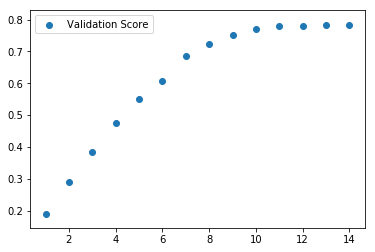

Best Model:  13


In [49]:
#SET THE DEPTH VALUE OF 1 TO 15 FOR TREES AND EXECUTE THE DECISIONS TREE TO RETURN THE MODEL FIT
d = range(1,15)
validation_score_list = []

for depth in d:
    DT_train_model1 = tree.DecisionTreeClassifier(max_depth=depth)
    validation_score = np.mean(cross_val_score(DT_train_model1, X_PCA_NCOMP, y_train, cv = 5))
    validation_score_list.append(validation_score)
    
plt.scatter(b, validation_score_list,label="Validation Score")
plt.legend();
plt.show();

print("Best Model: ", validation_score_list.index(np.max(validation_score_list))+1)

In [50]:
#LIST DOWN THE VALUE OF THE SCORE
for i in enumerate(validation_score_list):
    print("Fold %i: %3.3f" % (i))

Fold 0: 0.191
Fold 1: 0.290
Fold 2: 0.383
Fold 3: 0.476
Fold 4: 0.549
Fold 5: 0.606
Fold 6: 0.686
Fold 7: 0.723
Fold 8: 0.752
Fold 9: 0.771
Fold 10: 0.781
Fold 11: 0.781
Fold 12: 0.784
Fold 13: 0.783


As mentioned earlier the reason to use cross validation is to make sure we have a better model, and also as we know decisions trees perform well when they have the optimal depth. But in this case we chose the Cross Validation to be an optimal Fold of 5 which is 4:1 split of training/validation, but the max depth given is just 1 to 15.The number of dimensions present is approximately 500+ after applying the PCA, so for decision trees the deeper the tree the better the model. And from the above scores a depth of 13 seems to give a better score at 78.4 which i think is pretty for the data.

So the best approach would be to increase the number of depths and check again, but as this is for the whole training dataset this may take a lot of time and i will be excluding this analysis for this section.

As mentioned earlier for decision trees with the depth = 1 and depth = n i will use the same dataset i used for KNN in the seconds part of the analysis.

In [51]:
#SET THE MAX DEPTH OF THE TREE TO 1 - SAME AS KNN
DT_train_model1 = tree.DecisionTreeClassifier(max_depth=1)
DT_train_model1.fit(knn_train,y_train_knn)
print("The classification accuracy for training data is: %3.3f" % (DT_train_model1.score(knn_train,y_train_knn)* 100))
print("The classification accuracy for validation data is: %3.3f" % (DT_train_model1.score(knn_validate,y_validate_knn)* 100))
print("The classification accuracy for test data is: %3.3f" % (DT_train_model1.score(knn_xtest,y_test_knn)* 100))

The classification accuracy for training data is: 19.682
The classification accuracy for validation data is: 19.643
The classification accuracy for test data is: 19.721


In [52]:
#SET THE MAX DEPTH OF THE TREE TO N(LENTHG OF DATASET) - SAME AS KNN
lentree = len(knn_train)
DT_train_model1 = tree.DecisionTreeClassifier(max_depth=lentree)
DT_train_model1.fit(knn_train,y_train_knn)
print("The classification accuracy for training data is: %3.3f" % (DT_train_model1.score(knn_train,y_train_knn)* 100))
print("The classification accuracy for validation data is: %3.3f" % (DT_train_model1.score(knn_validate,y_validate_knn)* 100))
print("The classification accuracy for test data is: %3.3f" % (DT_train_model1.score(knn_xtest,y_test_knn)* 100))

The classification accuracy for training data is: 100.000
The classification accuracy for validation data is: 100.000
The classification accuracy for test data is: 100.000


The results we are seeing for the decision trees is the opposite of what we saw for KNN. Decision trees perform very well when they are able to evaluate all the features in the dataset which leads to overfitting the model. So this leads to low bias and high variance, meaning this works really well on the training dataset when it is able to identify the patterns of the dataset, but this will fail when we fit it to a newer dataset.

On the other hand when the maximum depth of the tree is 1 it performs poorly because it has lesser information to analyze, because it stops with the top level feature in the tree. This leads to high bias and low variance, hence an underfit model which does not take all the features into consideration.

One of the ways we can avoid the overfitting and underfitting issues is to prune the trees and use regularization of how much the depth can be and how many samples should be present per node.There are many other metrics we can consider for decision trees but not in scope for this analysis.

### UNDERSTAND SVM

I will be using SVM which is a supervised machine learning algorithm, used for both classification and regression problems.Support Vector Machines is used to find the best linear line that seperates or classifies data, but the actual goal is to find the hyperplane with larger margins.

The goal is to get the highest possible accuracy on the validation set by optimizing the hyperparameters. For this first i choose to use the Simple Linear SVC Model where the decision boundary is a straight line and tune the hyperparameter C which is the regularization strength when a digit or number is misclassified.Depending on what number is provided here the model is penalized if something is misclassified.

Below are the model settings i have chosen along with the outputs.

In [7]:
#FIT THE SVC MODEL WITH THE CHOSEN ATTRIBUTES
my_kernel_SVM = SVC(kernel='linear',C=0.01)
my_kernel_SVM.fit(standard_train,y_train)

#Get the score
print("Kernel SVM score: %3.3f" % (100*my_kernel_SVM.score(standard_train,y_train)))

Kernel SVM score: 96.962


In [8]:
#GET THE VALIDATION SCORE
print("Kernel SVM Validation score: %3.3f" % (100*my_kernel_SVM.score(standard_validate,y_validate)))

Kernel SVM Validation score: 93.543


On the training dataset it seems to be an overfit model, but the validation score looks good so I believe it to be an acceptable model.

#### CONFUSION MATRIX

Until now i have been measuring the accuracy of the models using the classification scores, but there are other parameters which can help assess the accuracy of the models. A Confusion Matrix helps measure the performance of the model and represents the information in a matrix table, usually it is for classification problems. Each rows in the Confusion Matrix are the instances of the actual class and each column represent the instances of the predicted class. The diagonally represented elements in the matrix are the true positives that were predicted.

Precision and Recall are some of the metrics that can be extracted from the Confusion Matrix and they rely on the 4 possible outcomes of True Positive, True Negative, False Positive and False Negative. The Accuracy Scores are actually decided by the True Positives and True Negatives.

In order to calculate the precision & recall (per class), we need to compute the TP, FP, and FN per class. To break the Confusion Matrix and understand the results i have shown each metric representation of the confusion matrix.

1) True Positives are simply the diagonal elements - Actual Values

2) False Positives are the Sum of Columns minus True Positives - Incorrectly Identified The Class

3) False Negatives are the Sum of Rows minus True Positives - Incorrectly Reject the Actual Class

4) True Negative - Correctly Rejected

In [9]:
#PREDICT FOR TEST DATA
predicted = my_kernel_SVM.predict(standard_xtest)
print("Kernel SVM Test score: %3.3f" % (100*my_kernel_SVM.score(standard_xtest,y_test)))

#CONFUSION MATRIX
cm = confusion_matrix(y_test, predicted)
print("Confusion matrix:\n%s" % cm)

Kernel SVM Test score: 93.710
Confusion matrix:
[[2334    1    7    4   10    9   11    0    9    1]
 [   0 2711   12    5    2    7    1    5   13    2]
 [  20   29 2298   27   29    6   22   20   26    4]
 [   4   21   62 2321    5   73    1   19   34   14]
 [   6   10   11    2 2315    2    8    5    7   63]
 [  15   15   13   58   25 2035   31    4   32   10]
 [  19    7   17    4   24   20 2266    0    5    0]
 [  12    8   27   18   35    4    1 2359    7   58]
 [  12   44   23   39    9   63    9    9 2153   13]
 [  20   10    8   22   68   15    1   64   14 2167]]


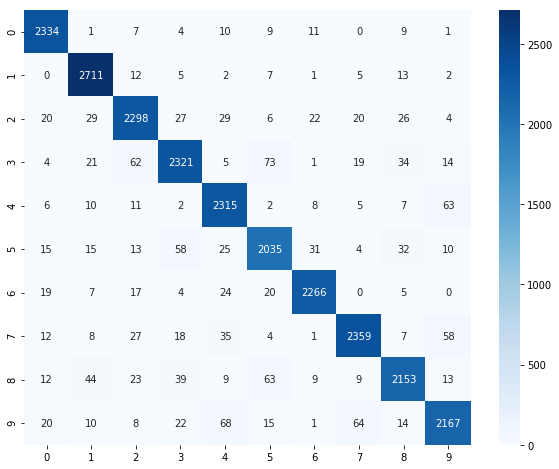

In [10]:
#PLOT THE CONFUSION MATRIX
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

In [11]:
#SHOW TRUE POSITIVES, FALSE POSITIVES AND FALSE NEGATIVES
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
print(TP)
print(FP)
print(FN)

[2334 2711 2298 2321 2315 2035 2266 2359 2153 2167]
[108 145 180 179 207 199  85 126 147 165]
[ 52  47 183 233 114 203  96 170 221 222]


To make the analysis easier i have shown the True Postives, False Positives and False Negatives. So from the above confusion matrix,all the True Positives are the diagonally dark blue shaded cells. And what i can infer from the matrix by just looking at the False Negatives is that the number of times the digits 2,3,5,8 and 9 were incorrectly rejected was higher in number especially 5 and 8. The digit 5 and 8 were predicted as a "3" and it can also be seen that 3 had the highest False Positives. Another 2 digits that were "9" and "4" where they were misclassified.Also "2" and "3" seem to be another pair of digits to be misclassified.All these digits that i have mentioned seem to have some curvy shapes which could be lead to a lot of misrepresentation.

[0.9782062  0.98295867 0.92623942 0.90877056 0.95306711 0.90929401
 0.95935648 0.93277975 0.90690817 0.90707409]
[0.95577396 0.94922969 0.92736077 0.9284     0.91792228 0.91092211
 0.96384517 0.94929577 0.93608696 0.92924528]


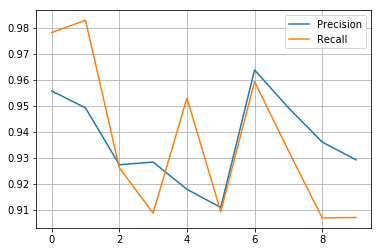

In [17]:
#CALCULATE PRECISION AND RECALL
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(recall)
print(precision)

plt.plot(precision,label = "Precision")
plt.plot(recall,label = "Recall")
plt.grid()
plt.legend()
plt.show()

So i wanted to check the Precision and Recall for each class from the confusion matrix.Precision is the fraction where the algorithm correctly predicted the classes out of all the instances of the class and Recall is the fraction where the algorithm correctly predicted something out of all of the cases which are labelled.

The above scores for precision and recall have been extracted for the predicted classes, and what i can intepret from the scores is that for the classes 0,1,2 and 4 "Recall" is higher than "Precision" which means the classifier was able to  return most of the relevant results.Similarly for values 6 to 9 with higher "Precision" the classifier was able to return more correct results than incorrect ones.

In [17]:
from sklearn.dummy import DummyClassifier
simple_model = DummyClassifier(strategy='most_frequent')
simple_model.fit(standard_train,y_train)
print("Model score: %3.3f" % ( 100 * simple_model.score(standard_train,y_train)))

Model score: 11.219


The goal is the use the Linear SVC Model with the same parameters on the dataset which only contain the numbers 4 and 9. So below i have created a dataframe for this and applied the same rules which i used above.

In [22]:
#EXTRACT THE IMAGE CLASS OF 4 AND 9 INTO A SEPERATE DATAFRAME
#del image_df
image_df = pd.DataFrame(np.hstack((data['data'].T, data['label'].T)))
#image_df.head()

#EXTRACT THE 4 AND THE 9 FROM THE ORIGINAL DATAFRAME.
four = image_df[image_df[image_df.columns[784]] == 4.0]
nine = image_df[image_df[image_df.columns[784]] == 9.0]
image_df_specific =  four.append(nine)
#image_df_specific.head(20)

In [23]:
#CREATE X AND Y COLUMNS FROM THE DATAFRAME
x1 = image_df_specific
x1 = x1.iloc[:, :-1]
y1 = image_df_specific[784]

In [24]:
#STANDARD SCALE OF THE X DATA.
scalar = StandardScaler()
scalar.fit(x1)
x1 = scalar.transform(x1)

In [25]:
#FIT THE SVC MODEL WITH THIS CHOSEN ATTRIBUTES FOR THE VALUES 4 AND 9
my_kernel_SVM_SPEC = SVC(kernel='linear',C=0.01)
my_kernel_SVM_SPEC.fit(x1,y1)

#Get the score
print("Kernel SVM score: %3.3f" % (100*my_kernel_SVM_SPEC.score(x1,y1)))

Kernel SVM score: 98.106


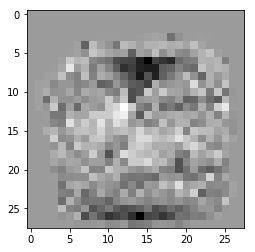

In [26]:
#VISUALIZE THE COEEFICIENTS OF THE MODEL
images1 = my_kernel_SVM_SPEC.coef_
plt.figure(figsize=(20,4))
plt.imshow((images1).reshape(28,28),cmap="Greys")
plt.show()

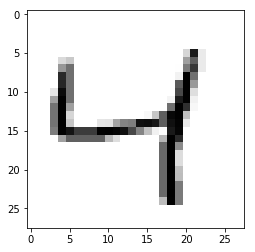

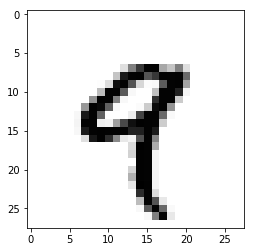

In [48]:
#PLOTTING THE 4 AND THE 9
imagefour = four.iloc[:1, :-1]
imagefour
imagenine = nine.iloc[:1, :-1]
imagenine

plt.figure(figsize=(20,4))
plt.imshow((imagefour).values.reshape(28,28),cmap="Greys")
plt.show()

plt.figure(figsize=(20,4))
plt.imshow((imagenine).values.reshape(28,28),cmap="Greys")
plt.show()

From the above image i can see that in the upper and lower portion where the black is seen more than the other parts of the image could represent the 9 . Moreover there are some people who may be writing very curvy nine's, which is why the lower part also shows a little shade of black. 

And whereever the white shade is present , like some parts in the middle and on the right side seems more like the representation of the 4. The shades that are completely grey dont mean anything, they are just coefficients which are zero.

So to show it more clearly i am displaying one of the images for 4 and 9 to compare with the image from the positive and negative coefficients.

#### RANDOM TREE FOREST - ENSEMBLE

Ensemble Algorithms combine same or different algorithms and used for classification. Random Forest is an ensemble classification algorithm which creates a set of decision trees for a subset of the data.And the final result for the Random Forest is the aggregated results from all the decision trees.

The random forest works by selecting random samples of data and building decision trees for each sample and each tree will have an outcome.For each decision trees predicted outcome, there will be a vote applied and the most votes results will be taken as the final prediction. Some of the Advantages of using a Random Forest are that:

1) It can be used for Classification and Regression Problems.

2) Feature Selection is an important aspect of Random Forest

3) As it mostly takes the average of the predictions, we can avoid overfitting issues which we see in decision trees.

So I have started by fitting a random forest to the training data and also using cross validation.

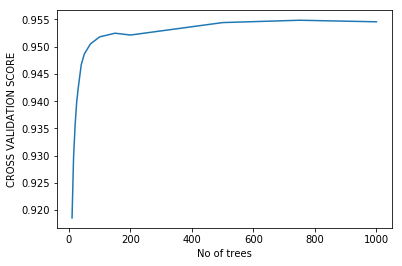

In [49]:
#BUILD A RANDOMFOREST FOR THE MNIST DATASET WITH VARIOUS TREE LEVELS SET
scores = []
n_trees = [10, 15, 20, 25, 30, 40, 50, 70, 100, 150, 200, 500, 750, 1000]

for n_tree in n_trees:        
        my_random_forest = RandomForestClassifier(n_estimators=n_tree)
        validationscore = cross_val_score(my_random_forest, standard_train, y_train)
        scores.append(np.mean(validationscore))

#plt.figure(figsize=(4,3))
plt.plot(n_trees, scores)
plt.ylabel('CROSS VALIDATION SCORE')
plt.xlabel('No of trees')
plt.show()

In [50]:
for i in enumerate(scores):
    print ("Random Forest Validation score:", i)

Random Forest Validation score: (0, 0.918571165710377)
Random Forest Validation score: (1, 0.9297615064528344)
Random Forest Validation score: (2, 0.9356188945189379)
Random Forest Validation score: (3, 0.9397616975121309)
Random Forest Validation score: (4, 0.942380527576253)
Random Forest Validation score: (5, 0.9467139971972554)
Random Forest Validation score: (6, 0.948666405461592)
Random Forest Validation score: (7, 0.9505234803731509)
Random Forest Validation score: (8, 0.9518093172361347)
Random Forest Validation score: (9, 0.9524759566763658)
Random Forest Validation score: (10, 0.9521424600777131)
Random Forest Validation score: (11, 0.9544283785811309)
Random Forest Validation score: (12, 0.9548569092205835)
Random Forest Validation score: (13, 0.9545712765442054)


The Random Forest seems to be very stable with a validation score of 95.4 and 750 estimators seem to be a very good number as it has the maximunm validation accuracy.Setting the estimators to a higher value seems to have improved the accuracy of the model.

N_Estimator is the parameter to decide on how many trees we want, and so setting it to a high level improves the performance and stability, and provides better prediction scores.

min_samples_leaf is the size of the leaf node which is the end of the decision tree and a very small leaf tends to capture more noise so we have to find the most optimum sample size.

oob_score is a score obtained from the training dataset to get the generalization error.

In [50]:
#FIT THE MODEL WITH THE OPITMIZATION PARAMETERS - BASED ON THE ABOVE CROSS VALIDATION SCORES
my_random_forest_opt = RandomForestClassifier(n_estimators=750,oob_score = 'TRUE', min_samples_leaf=20,n_jobs=-1)
my_random_forest_opt.fit(standard_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=-1,
            oob_score='TRUE', random_state=None, verbose=0,
            warm_start=False)

In [51]:
decision_tree_scores = []
for  sub_tree in my_random_forest_opt.estimators_:
    decision_tree_scores.append(sub_tree.score(standard_train, y_train))
    
print("Performance on FITTED data:")
print("Best Decision Tree: %3.3f" % (100*max(decision_tree_scores)))
print("Worst Decision Tree: %3.3f" % (100*min(decision_tree_scores)))
print("Average Decision Tree: %3.3f" % (100*np.mean(decision_tree_scores)))
print("Random forest: %3.3f" % (100*my_random_forest_opt.score(standard_train, y_train)))
print("Validation score: %3.3f" % (100*my_random_forest_opt.score(standard_validate, y_validate)))
print("Testing score: %3.3f" % (100*my_random_forest_opt.score(standard_xtest,y_test)))

Performance on FITTED data:
Best Decision Tree: 78.267
Worst Decision Tree: 73.524
Average Decision Tree: 75.954
Random forest: 95.729
Validation score: 93.669
Testing score: 93.661


For this sample training dataset the parameters n_estimator and the min_samples_leaf seem to perform much better than the others. The training accuracy of 95% was reached with the trees set to 750 and beyond that it did not seem to impact the model in any way. Also when the leaf samples were set to 20 the model fit showed slight variations when compared to 25 or 50 leaves. All the other remaining parameters like max depth and max-features did not have any impact on this model, so i excluded them after running multiple tests.

#### PREDICT AND VISUALIZE

Confusion matrix:
[[2357    0    4    1    2    3   14    2   26    1]
 [   0 2741   20   13    4    8    4   10    8    4]
 [  20    7 2296   15   27    3   29   46   27   11]
 [   6   10   61 2232    6   38    6   21   34   20]
 [   5    2    8    0 2182    3   21    4   12   92]
 [  18   24    7   39   10 2012   36    5   24   20]
 [  19   12   10    0   16   21 2350    1   11    0]
 [   7   18   33    3   29    0    0 2322    8   85]
 [   6   24   24   47   19   29   23    5 2233   47]
 [  19    4    9   46   54    9    4   42   28 2222]]


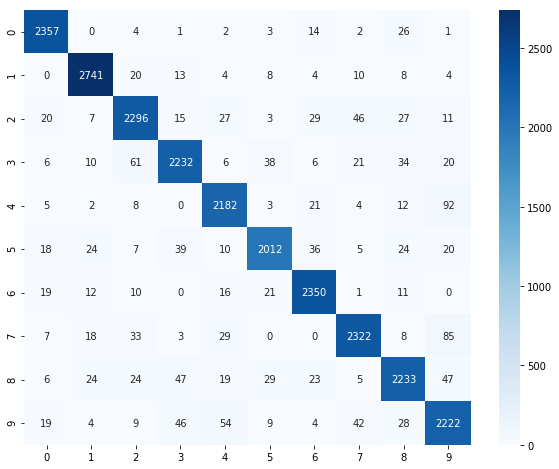

In [52]:
#PREDICT FOR TEST DATA
predicted_r = my_random_forest_opt.predict(standard_xtest)

#CONFUSION MATRIX
cmm = confusion_matrix(y_test, predicted_r)
print("Confusion matrix:\n%s" % cmm)

#PLOT THE CONFUSION MATRIX
plt.figure(figsize=(10,8))
sns.heatmap(cmm,annot=True,cmap='Blues', fmt='g')

[0.9780083  0.97475107 0.92543329 0.91700904 0.93688278 0.9166287
 0.96311475 0.92694611 0.90883191 0.91177677]
[0.95929996 0.96446165 0.92880259 0.93155259 0.92890592 0.94637817
 0.94491355 0.94467046 0.92617171 0.88808953]


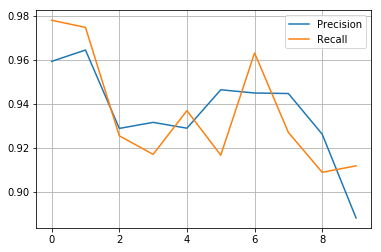

In [53]:
#CALCULATE PRECISION AND RECALL
recallr = np.diag(cmm) / np.sum(cmm, axis = 1)
precisionr = np.diag(cmm) / np.sum(cmm, axis = 0)
print(recallr)
print(precisionr)

plt.plot(precisionr,label = "Precision")
plt.plot(recallr,label = "Recall")
plt.grid()
plt.legend()
plt.show()

From what i can see from the Confusion Matrix and the Precision/Recall plots, the model has predicted the digits more correctly than the previous models in this assignment.

Especially looking at the plot, Precision and Recall are very close, and it looks like the Random Forest Classifer was able to predict most of the digits correctly. For digits 0,1,4 and 6 recall seems to be higher than precision so maximum predictions were correct. And for the remaining digits,precision was higher with more correct results being predicted than incorrect results.

We could have more optimization parameters with this Random Forest, but this is the best forest that i could find.

In [54]:
#SAVE THE MODEL
from sklearn.externals import joblib

# Save model
joblib.dump(my_random_forest_opt, 'Anna-MNIST_RF.pkl')

# Load model
my_random_forest_opt = joblib.load('Anna-MNIST_RF.pkl')
